In [1]:
#loading the data
from keras.datasets import cifar10

import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

170508288/170498071 [==============================] - 2s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [2]:
#one-hot encode the labels
def to_one_hot(y, num_class=10):    
    result = numpy.zeros((len(y),num_class))
    for i,y in enumerate(y):
        result[i,y]=1
    return result

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [3]:
 #Randomly partition the training set to training and validation sets
 rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


In [4]:
#Build a CNN and tune its hyper-parameters
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))  
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2)) 
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0

In [5]:
from keras import optimizers

learning_rate = 0.001

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
history = model.fit(x_tr, y_tr, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
313/313 [==============================] - 56s 27ms/step - loss: 2.1454 - acc: 0.2787 - val_loss: 1.4100 - val_acc: 0.4967
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 1.3195 - acc: 0.5223 - val_loss: 1.2271 - val_acc: 0.5523
Epoch 3/20
313/313 [==============================] - 7s 22ms/step - loss: 1.0672 - acc: 0.6194 - val_loss: 1.1470 - val_acc: 0.5917
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 0.9391 - acc: 0.6666 - val_loss: 1.0655 - val_acc: 0.6287
Epoch 5/20
313/313 [==============================] - 7s 23ms/step - loss: 0.8435 - acc: 0.7065 - val_loss: 0.8519 - val_acc: 0.7005
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.7771 - acc: 0.7258 - val_loss: 0.7865 - val_acc: 0.7313
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.7269 - acc: 0.7457 - val_loss: 0.7642 - val_acc: 0.7351
Epoch 8/20
313/313 [==============================] - 7s 23ms/step -

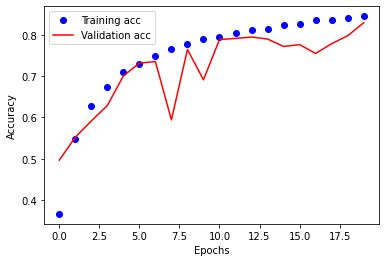

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
#training the model on entire training set
learning_rate = 0.001 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
history = model.fit(x_train, y_train_vec, batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 12s 23ms/step - loss: 0.5058 - acc: 0.8308
Epoch 2/20
391/391 [==============================] - 8s 22ms/step - loss: 0.4741 - acc: 0.8406
Epoch 3/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4608 - acc: 0.8467
Epoch 4/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4538 - acc: 0.8472
Epoch 5/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4410 - acc: 0.8509
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4285 - acc: 0.8531
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4212 - acc: 0.8588
Epoch 8/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4180 - acc: 0.8593
Epoch 9/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4020 - acc: 0.8659
Epoch 10/20
391/391 [==============================] - 8s 21ms/step - loss: 0.4028 - acc: 0.8653
Epoch 11/20
391/391 [=================

In [10]:
#evaluating model on test data
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 2s 3ms/step - loss: 0.5491 - acc: 0.8362
loss = 0.5491291284561157
accuracy = 0.8361999988555908
